In [0]:
!unzip classifiedData.zip

In [0]:
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense
from keras.applications.vgg16 import VGG16
from keras import backend as K


In [0]:
import numpy as np
from scipy import misc
from tqdm import tqdm
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D
from keras.layers import Activation, Dropout, Flatten, Dense

from keras import backend as K

from keras.applications.xception import Xception,preprocess_input
from keras.layers import Input,Dense,Dropout
from keras.models import Model

In [0]:
from keras.models import Model
from keras import layers
from keras.layers import Dense, Input, BatchNormalization, Activation
from keras.layers import Conv2D, SeparableConv2D, MaxPooling2D, GlobalAveragePooling2D, GlobalMaxPooling2D
from keras_applications.imagenet_utils import _obtain_input_shape
from keras.utils.data_utils import get_file

WEIGHTS_PATH = 'https://github.com/fchollet/deep-learning-models/releases/download/v0.4/xception_weights_tf_dim_ordering_tf_kernels.h5'

def Xception():

	# Determine proper input shape
	input_shape = _obtain_input_shape(None, default_size=299, min_size=71, data_format='channels_last', require_flatten=False)

	img_input = Input(shape=input_shape)

	# Block 1
	x = Conv2D(32, (3, 3), strides=(2, 2), use_bias=False)(img_input)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = Conv2D(64, (3, 3), use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)

	residual = Conv2D(128, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 2
	x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(128, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	# Block 2 Pool
	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	residual = Conv2D(256, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 3
	x = Activation('relu')(x)
	x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(256, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	# Block 3 Pool
	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	residual = Conv2D(728, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 4
	x = Activation('relu')(x)
	x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	# Block 5 - 12
	for i in range(8):
		residual = x

		x = Activation('relu')(x)
		x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
		x = BatchNormalization()(x)
		x = Activation('relu')(x)
		x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
		x = BatchNormalization()(x)
		x = Activation('relu')(x)
		x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
		x = BatchNormalization()(x)

		x = layers.add([x, residual])

	residual = Conv2D(1024, (1, 1), strides=(2, 2), padding='same', use_bias=False)(x)
	residual = BatchNormalization()(residual)

	# Block 13
	x = Activation('relu')(x)
	x = SeparableConv2D(728, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)
	x = SeparableConv2D(1024, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)

	# Block 13 Pool
	x = MaxPooling2D((3, 3), strides=(2, 2), padding='same')(x)
	x = layers.add([x, residual])

	# Block 14
	x = SeparableConv2D(1536, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)

	# Block 14 part 2
	x = SeparableConv2D(2048, (3, 3), padding='same', use_bias=False)(x)
	x = BatchNormalization()(x)
	x = Activation('relu')(x)

	# Fully Connected Layer
	x = GlobalAveragePooling2D()(x)
	x = Dense(8, activation='softmax')(x)

	inputs = img_input

	# Create model
	model = Model(inputs, x, name='xception')

	# Download and cache the Xception weights file
# 	weights_path = get_file('xception_weights.h5', WEIGHTS_PATH, cache_subdir='models')

# 	# load weights
# 	model.load_weights(weights_path)

	return model

model = Xception()

In [0]:
img_width, img_height = 224,224
if K.image_data_format() == 'channels_first':
    input_shape = (3, img_width, img_height)
else:
    input_shape = (img_width, img_height, 3)

In [0]:
# input = Input(input_shape,name = 'image_input')

# #Use the generated model 
# output_model = model(input)

# #Add the fully-connected layers 
# x = Flatten(name='flatten')(output_model)
# x = Dense(4096, activation='relu', name='fc1')(x)
# x = Dense(4096, activation='relu', name='fc2')(x)
# x = Dense(8, activation='softmax', name='predictions')(x)

# #Create your own model 
# my_model = Model(input=input, output=x)


In [0]:
model.compile(loss='categorical_crossentropy',
              optimizer='rmsprop',
              metrics=['accuracy'])

In [0]:
train_datagen = ImageDataGenerator(
        rescale=1./255)
train_generator = train_datagen.flow_from_directory(
        directory = r'classifiedData/training',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')
test_datagen = ImageDataGenerator(
        rescale=1./255)
test_generator = train_datagen.flow_from_directory(
        directory = r'classifiedData/validation',
        color_mode="rgb",
        target_size=(224, 224),
        batch_size=32,
        class_mode='categorical')

val_labels = []

for i in range(0,2048//32):
    val_labels.extend(np.array(test_generator[i][1]))

Found 11630 images belonging to 8 classes.
Found 2048 images belonging to 8 classes.


In [0]:
H = model.fit_generator(
    train_generator,
    epochs=20,
    validation_data=test_generator,
    steps_per_epoch=11630/32,
    validation_steps=2048/32
    )

Instructions for updating:
Use tf.cast instead.
Epoch 1/20
364/363 [==============================] - 522s 1s/step - loss: 1.1599 - acc: 0.4770 - val_loss: 11.1928 - val_acc: 0.2236
Epoch 2/20
364/363 [==============================] - 507s 1s/step - loss: 0.9251 - acc: 0.6207 - val_loss: 1.5507 - val_acc: 0.4189
Epoch 3/20
364/363 [==============================] - 509s 1s/step - loss: 0.6817 - acc: 0.7736 - val_loss: 1.5477 - val_acc: 0.4395
Epoch 4/20
364/363 [==============================] - 509s 1s/step - loss: 0.5638 - acc: 0.8121 - val_loss: 1.0526 - val_acc: 0.6777
Epoch 5/20
364/363 [==============================] - 509s 1s/step - loss: 0.5035 - acc: 0.8355 - val_loss: 1.0494 - val_acc: 0.7026
Epoch 6/20
364/363 [==============================] - 509s 1s/step - loss: 0.4601 - acc: 0.8499 - val_loss: 0.7768 - val_acc: 0.7295
Epoch 7/20
364/363 [==============================] - 509s 1s/step - loss: 0.4217 - acc: 0.8584 - val_loss: 0.6578 - val_acc: 0.7886
Epoch 8/20
364/363 [

In [0]:
from keras.callbacks import ModelCheckpoint
import json
model.save("xception.model")
json.dump(H.history, open("xception.hist", "w"))


In [0]:
# import numpy as np
# from sklearn.metrics import classification_report
# from sklearn.preprocessing import LabelBinarizer

# predIdxs_val = model.predict_generator(test_generator,
#                                    steps=2048/32 + 1)
# predIdxs_val = np.argmax(predIdxs_val, axis=1)
# print(classification_report(np.argmax(val_labels,axis=1), predIdxs_val))

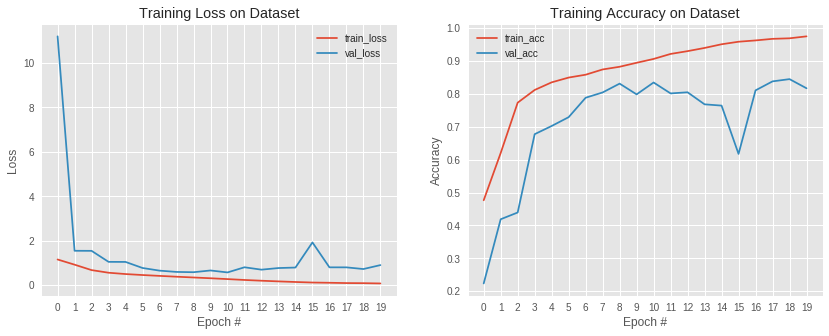

In [0]:
import matplotlib.pyplot as plt

N = 20
plt.style.use("ggplot")
plt.figure(figsize=[14,5])
plt.subplot(1,2,1)
plt.plot(np.arange(0, N), H.history["loss"], label="train_loss")
plt.plot(np.arange(0, N), H.history["val_loss"], label="val_loss")
plt.title("Training Loss on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Loss")
plt.xticks(np.arange(0, N))
plt.legend()

plt.subplot(1,2,2)
plt.plot(np.arange(0, N), H.history["acc"], label="train_acc")
plt.plot(np.arange(0, N), H.history["val_acc"], label="val_acc")
plt.title("Training Accuracy on Dataset")
plt.xlabel("Epoch #")
plt.ylabel("Accuracy")
plt.xticks(np.arange(0, N))
plt.legend()
plt.show()

In [0]:
# make predictions on the validation images, finding the index of the
# label with the corresponding largest predicted probability
predIdxs_test = model.predict_generator(test_generator,
                                   steps=2737//32 + 1)
predIdxs_test = np.argmax(predIdxs_test, axis=1)

# show a nicely formatted classification report
print(classification_report(np.argmax(val_labels,axis=1), predIdxs_test))

NameError: ignored